In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
columns_measurement = inspector.get_columns('measurement')
for c in columns_measurement:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [23]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

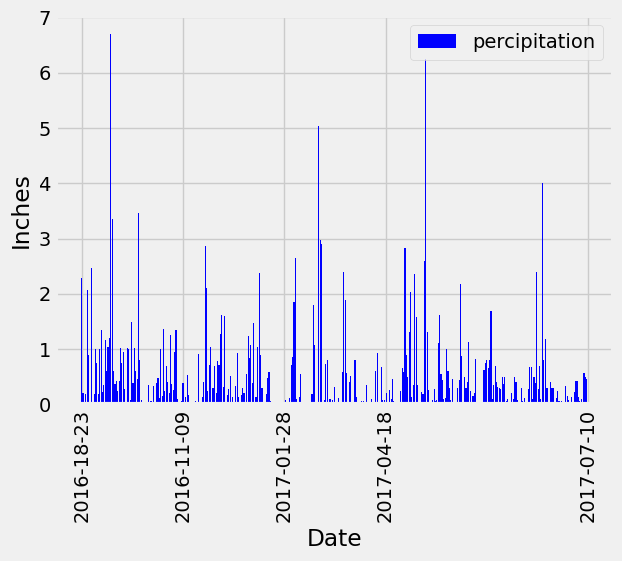

In [59]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
data = session.query(measurement.date, measurement.prcp).filter(measurement.date > '2016-08-23').order_by(measurement.date).all()
df = pd.DataFrame(data, columns =['Date', 'Precipitation (in.)'])

# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(df['Date'], df['Precipitation (in.)'], color='b', label='percipitation')
plt.xticks([0, 73, 146, 219, 365], ['2016-18-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10'])
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend()

plt.show()

In [60]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation (in.)
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [61]:
columns_station = inspector.get_columns('station')
for c in columns_station:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [62]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [87]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').all()
list = []
list.append(np.amin(temps))
list.append(np.amax(temps))
list.append(np.average(temps))
list

[54.0, 85.0, 71.66378066378067]

Text(0, 0.5, 'Frequency')

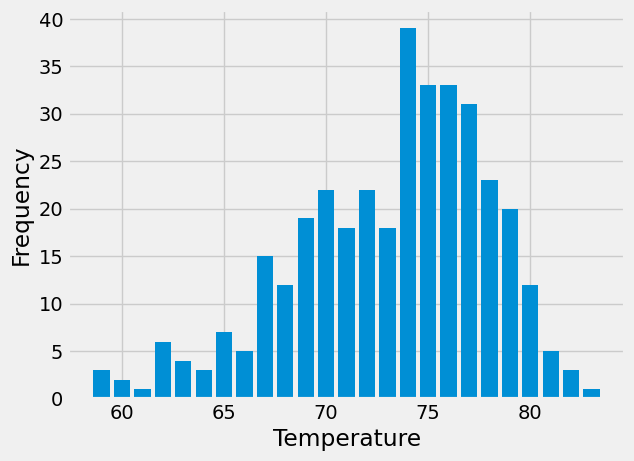

In [147]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
month_temps = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date > '2016-08-23').all()
x = []
for i in range(59, 84):
    x.append(i)
y = [3, 2, 1, 6, 4, 3, 7, 5, 15, 12, 19, 22, 18, 22, 18, 39, 33, 33, 31, 23, 20, 12, 5, 3, 1]
plt.bar(x, y)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close Session

In [148]:
# Close Session
session.close()